In [1]:
import pandas as pd
# read the file Boston.csv into pandas dataframe
df = pd.read_csv('Boston.csv')
df.head() # view top portion of file

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
import statsmodels.formula.api as smf
# fit a model with predictors lstat and age
lm_fit = smf.ols('medv~lstat+age', data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.98e-88
Time:                        16:04:24   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# create a formula with all predictors
columns_selected = "+".join(df.columns.difference(["medv"]))
my_formula = "medv~" + columns_selected
my_formula

'medv~age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [4]:
# linear regression with all predictors
lm_fit = smf.ols(formula = my_formula, data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        16:04:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
lm_fit.resid.describe()

count    5.060000e+02
mean    -2.238350e-14
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

In [6]:
# interaction terms: lmstat*age includes lstat, age, and lmstat*age
lm_fit = smf.ols('medv~lstat*age', data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           4.86e-88
Time:                        16:04:24   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# adding predictor lstat^2
import numpy as np
lm_fit2 = smf.ols('medv~lstat+np.power(lstat, 2)', data=df).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.56e-112
Time:                        16:04:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# adding predictor lstat^2
import numpy as np
lm_fit2 = smf.ols('medv~lstat+np.power(lstat, 2)', data=df).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.56e-112
Time:                        16:04:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import statsmodels.api as sm

lm_fit = smf.ols('medv~lstat', data=df).fit()
table = sm.stats.anova_lm(lm_fit, lm_fit2, typ=1)
print(table)


   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


In [10]:
columns =  "+".join(df.columns.difference(["medv"]))
myformula = "medv~"+columns
myformula


'medv~age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

<Axes: >

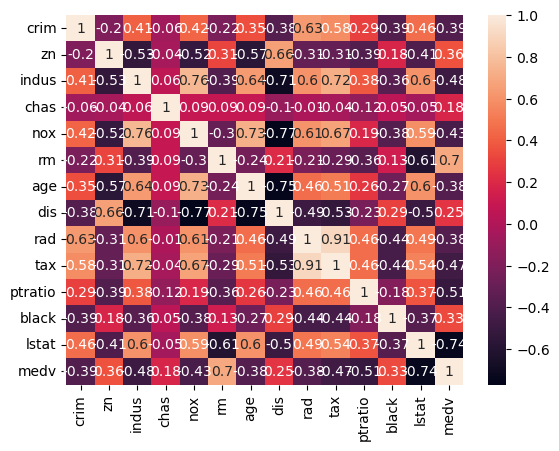

In [11]:
import seaborn as sns 
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
# high correlation of 0.91 between rad and tax; use one of these but not both in the model.

In [12]:
columns

'age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [13]:
columns1 =  "+".join(df.columns.difference(["medv", "tax"]))
my_formula1 = "medv~"+columns1
my_formula1

'medv~age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+zn'

In [14]:
# linear regression with all predictors except tax
lm_fit1 = smf.ols(formula = my_formula1, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.21e-133
Time:                        16:04:25   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6286      5.123      6.760      0.000      24.563      44.694
age           -0.0006      0.013     -0.045      0.964      -0.027       0.026
black          0.0095      0.003      3.521      0.000       0.004       0.015
chas           3.0292      0.864      3.507      0.000       1.332       4.726
crim          -0.1067      0.033     -3.216      0.001      -0.172      -0.042
dis           -1.4883      0.201     -7.390      0.000      -1.884      -1.093
indus         -0.0678      0.056     -1.214      0.225      -0.177       0.042
lstat         -0.5222      0.051    -10.198      0.000      -0.623      -0.422
nox          -18.7012      3.847     -4.862      0.000     -26.259     -11.143
ptratio       -0.9851      0.132     -7.478      0.000      -1.244      -0.726
rad            0.1346      0.041      3.262      0.001       0.054       0.216
rm             3.9117      0.421      9.294      0.000       3.085       4.739
zn             0.0364      0.014      2.692      0.007       0.010       0.063
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
columns1 =  "+".join(df.columns.difference(["medv", "tax", "age", "indus"]))
my_formula1 = "medv~"+columns1
my_formula1
# linear regression with all predictors except tax, age and indus
lm_fit1 = smf.ols(formula = my_formula1, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.84e-135
Time:                        16:04:25   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7123      5.103      6.803      0.000      24.687      44.738
black          0.0097      0.003      3.591      0.000       0.004       0.015
chas           2.9679      0.861      3.448      0.001       1.277       4.659
crim          -0.1048      0.033     -3.164      0.002      -0.170      -0.040
dis           -1.4294      0.187     -7.647      0.000      -1.797      -1.062
lstat         -0.5281      0.048    -11.019      0.000      -0.622      -0.434
nox          -20.3144      3.472     -5.850      0.000     -27.137     -13.492
ptratio       -1.0149      0.129     -7.867      0.000      -1.268      -0.761
rad            0.1288      0.041      3.157      0.002       0.049       0.209
rm             3.9771      0.408      9.754      0.000       3.176       4.778
zn             0.0366      0.013      2.731      0.007       0.010       0.063
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.418
Skew:                           1.441   Prob(JB):                    2.40e-149
Kurtosis:                       7.915   Cond. No.                     9.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""